# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
states_data = pd.read_csv('../data/states_edu.csv')
states_data.head(2)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [6]:
states_data.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [9]:
num_years = len(states_data['YEAR'].unique())
num_years
states_data.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [16]:
# @@@ 2
scores = states_data.groupby('STATE')['AVG_MATH_4_SCORE'].mean()
scores

# MICHIGAN                234.363636
# OHIO                    239.454545

# Ohio has a higher average across all years in math 4 scores.

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your chosen test across all states in 2019

In [18]:
# @@@ 3
year_score_avg = states_data.groupby('YEAR')['AVG_MATH_4_SCORE'].mean()
year_score_avg

# Avergae for grade 4 math test across all states in 2019: 239.943396

YEAR
1986           NaN
1987           NaN
1988           NaN
1989           NaN
1990    213.000000
1991           NaN
1992    218.418605
1993           NaN
1994           NaN
1995           NaN
1996    224.000000
1997           NaN
1998           NaN
1999           NaN
2000    223.976744
2001           NaN
2002           NaN
2003    234.000000
2004           NaN
2005    237.169811
2006           NaN
2007    239.207547
2008           NaN
2009    239.547170
2010           NaN
2011    240.490566
2012           NaN
2013    241.962264
2014           NaN
2015    240.415094
2016           NaN
2017    239.433962
2019    239.943396
Name: AVG_MATH_4_SCORE, dtype: float64

For each state, find a maximum value for your chosen test score

In [19]:
# @@@ 4
max_per_state = states_data.groupby('STATE')['AVG_MATH_4_SCORE'].max()
max_per_state

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5

states_data['instruction_expenditure vs avg math 4 scores'] = states_data['INSTRUCTION_EXPENDITURE'] / states_data['AVG_MATH_4_SCORE'] 


Feature engineering justification: One of the features I wanted to introduce was the relationship between instruction_expenditure and avg_math_4_score. This is because, I hypothesize that spending more on instruction / teachers, will mean better quality of learning for children, thus higher test scores.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th grade math scores')

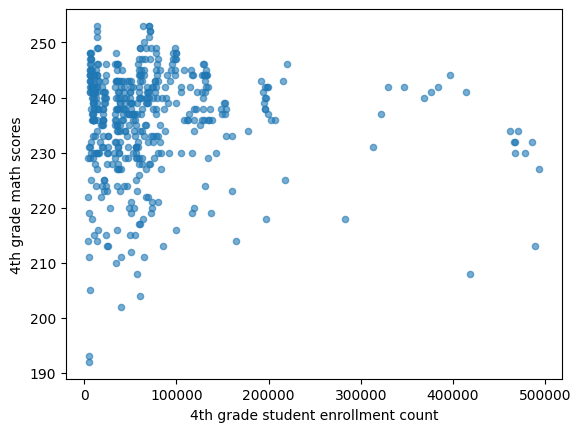

In [20]:
# @@@ 6
states_data.plot.scatter(x='ENROLL_4', y='AVG_MATH_4_SCORE', alpha = 0.6)
plt.xlabel('4th grade student enrollment count')
plt.ylabel('4th grade math scores')

4th grade math scores vs 4th grade student enrollment count

**Visualization 2**

Text(0, 0.5, '4th grade math scores')

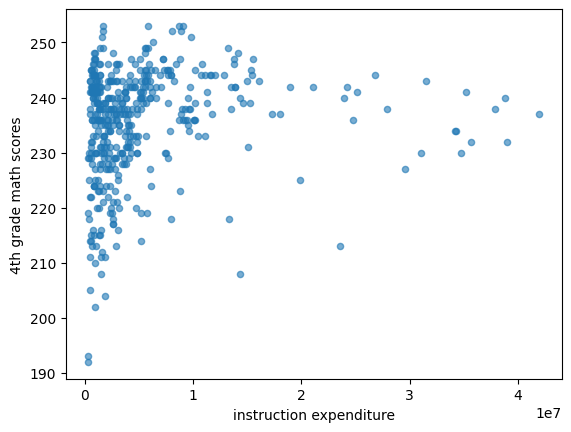

In [24]:
# @@@ 7
states_data.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha = 0.6)
plt.xlabel('instruction expenditure')
plt.ylabel('4th grade math scores')

grade 4 math scores vs instructional expenditure

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
# @@@ 8

X = states_data[['ENROLL_4', 'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE']].dropna()
y = states_data.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)

In [29]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [30]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [31]:
# @@@ 11
# create your model here
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [36]:
# @@@ 12
np.mean(np.abs(model.predict(X_test)-y_test))

np.mean((model.predict(X_test)-y_test)**2)**0.5

np.float64(1.0378140918593053e-14)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

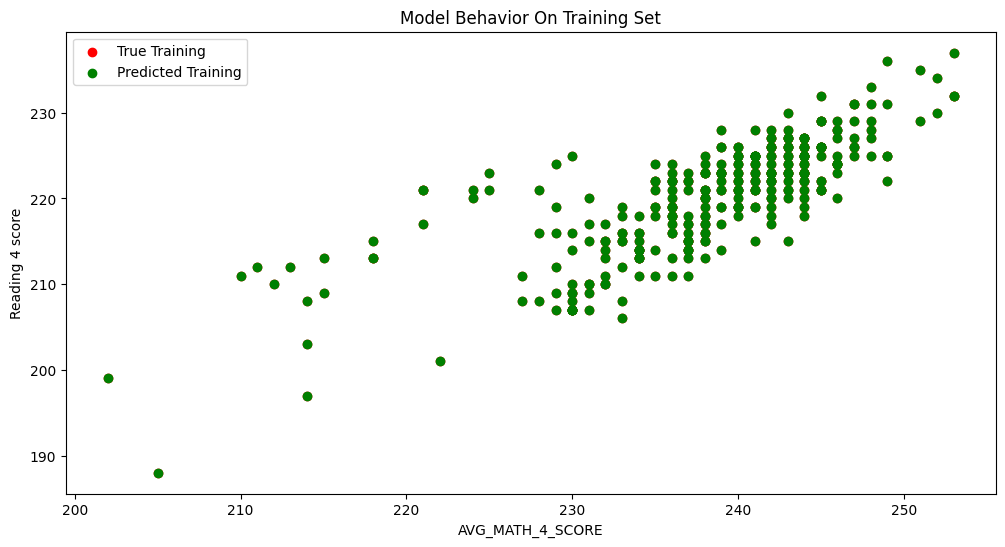

In [38]:
# @@@ 13

col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

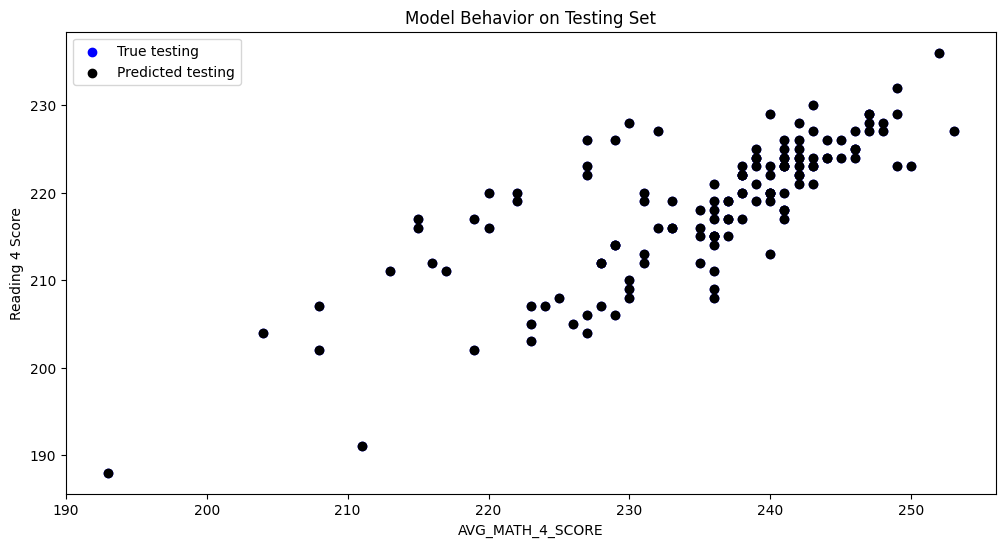

In [40]:
# @@@ 14


col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior on Testing Set")